## Evaluation

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
import pandas as pd
import numpy as np
from rouge import Rouge 
import seaborn as sns
from scipy import stats
from matplotlib.pyplot import figure

### Precision, Recall and F measure for location

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
import pandas as pd
import numpy as np
from rouge import Rouge 
# x = open(r"C:\Users\anike\Shodh_test.csv")
# y = open(r"C:\Users\anike\acled_test.csv")
# x = open(r"C:\Users\anike\airData\india\eval\eval_NB2.csv")
# x = open(r"C:\Users\anike\airData\india\eval\eval_SVM.csv")
x = open(r"C:\Users\anike\airData\india\eval\eval_RF_act2.csv", encoding="utf8")
y = open(r"C:\Users\anike\airData\india\eval\reference.csv", encoding="utf8")
df1 = pd.read_csv(x).fillna("")
df2 = pd.read_csv(y).fillna("")

y_true = np.array(df2['location'])
y_pred = np.array(df1['location'])

# precision_recall_fscore_support(y_true, y_pred, average='macro')


# precision_recall_fscore_support(y_true, y_pred, average='micro')
prfLocation = precision_recall_fscore_support(y_true, y_pred, average='weighted')
# prfEvent = precision_recall_fscore_support(np.array(df2['notes']), np.array(df1['summary']), average='weighted')

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Precision, Recall and F measure for parties involved

In [40]:
y_true = np.array(df2['actor1'])
y_pred = np.array(df1['partiesInvolved'])

# precision_recall_fscore_support(y_true, y_pred, average='macro')

# precision_recall_fscore_support(y_true, y_pred, average='micro')
prfParties = precision_recall_fscore_support(y_true, y_pred, average='weighted')
prfParties

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.14035087719298245, 0.3333333333333333, 0.19753086419753085, None)

# Precision, Recall and F measure for event type

In [41]:
y_true = np.array(df2['event_type'])
y_pred = np.array(df1['event'])

# precision_recall_fscore_support(y_true, y_pred, average='macro')

# precision_recall_fscore_support(y_true, y_pred, average='micro')
prfEvent= precision_recall_fscore_support(y_true, y_pred, average='weighted')
prfEvent

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.7973484848484849, 0.7916666666666666, 0.7425213675213675, None)

### Summary Rouge score

In [42]:
i = 0
r1_f = 0
r1_p = 0
r1_r=0
rl_f=0
rl_p=0
rl_r =0
while i < df1.shape[0]:
    rouge = Rouge()
    print(df1['summary'][i])
    print(df2['notes'][i])
    scores = rouge.get_scores(df1['summary'][i], df2['notes'][i])
    print(scores[0]['rouge-1'])
    print(scores[0]['rouge-l'])
    r1_f+=scores[0]['rouge-1']['f']
    rl_f+=scores[0]['rouge-l']['f']
    r1_p+=scores[0]['rouge-1']['p']
    rl_p+=scores[0]['rouge-l']['p']
    r1_r+=scores[0]['rouge-1']['r']
    rl_r+=scores[0]['rouge-l']['r']
    i+=1
i+=1
print("Rouge-1 average f measure: "+str(r1_f/i))
print("Rouge-l average f measure: "+str(rl_f/i))
print("Rouge-1 average p measure: "+str(r1_p/i))
print("Rouge-l average p measure: "+str(rl_p/i))
print("Rouge-1 average r measure: "+str(r1_r/i))
print("Rouge-l average r measure: "+str(rl_r/i))



On 11 Apr, Polling in Andhra Pradesh began on a peaceful note with a large number of voters turning up early in the morning to exercise their franchise.
On 11 Apr, in Tadipatri (Anantapur, AP), a TDP legislator along with his folllowers staged a protest in front of the local police station condemning the death of a TDP member in a clash with YSCRP workers.
{'f': 0.2962962913031551, 'p': 0.3076923076923077, 'r': 0.2857142857142857}
{'f': 0.25855090062698155, 'p': 0.2692307692307692, 'r': 0.25}
On 14 Apr, Party president YS Jaganmohan Reddy told media on the evening of polling day (Thursday) that women were angry at the TDP government and thus voting with vengeance.
On 11 Apr, in Chagalamarri tehsil (Kurnool, AP), incidents of stone-pelting by unknown groups were recorded during the AP general elections. No further information was provided.
{'f': 0.181818176833058, 'p': 0.1724137931034483, 'r': 0.19230769230769232}
{'f': 0.18074585964434564, 'p': 0.1724137931034483, 'r': 0.19230769230769

In [43]:
from decimal import Decimal
r1 =[round((r1_f/i),3),round((r1_p/i),3),round((r1_r/i),3)]
rl =[round((rl_f/i),3),round((rl_p/i),3),round((rl_r/i),3)]

# r1New =[round((r1_f/i),3),round((r1_p/i),3),round((r1_r/i),3)]
# rlNew =[round((rl_f/i),3),round((rl_p/i),3),round((rl_r/i),3)]

# r1

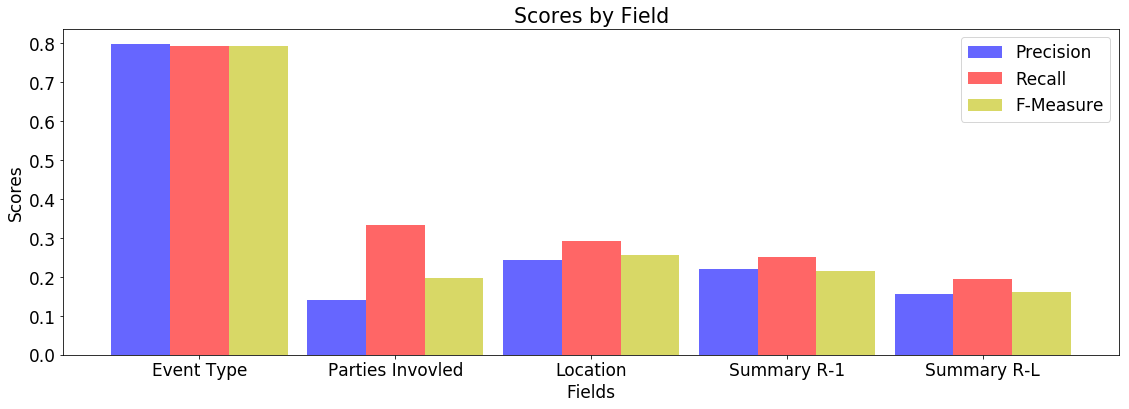

In [44]:
# data to plot
n_groups = 5
means_frank = (prfEvent[0],prfParties[0], prfLocation[0],r1[0],rl[0])
means_guido = (prfEvent[1],prfParties[1], prfLocation[1],r1[1],rl[1])
means_fmes = (prfEvent[1],prfParties[2], prfLocation[2],r1[2],rl[2])
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.6
 
rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Precision')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='r',
label='Recall')

rects3 = plt.bar(index + bar_width + bar_width, means_fmes, bar_width,
alpha=opacity,
color='y',
label='F-Measure')

plt.xlabel('Fields')
plt.ylabel('Scores')
plt.title('Scores by Field')
plt.xticks(index + bar_width, ('Event Type','Parties Invovled', 'Location','Summary R-1', 'Summary R-L'))
plt.legend()
plt.rcParams["figure.figsize"] = [16,6]
plt.rcParams.update({'font.size': 17})
plt.tight_layout()
# plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.show()
